
##### Data Analysis 2021 - Coursework 2 (45%)
# Analysing gravitational wave signals 
## Deadline Friday week 11, 2pm.



#### <div class = "tip">Instructions</div>

This coursework assesses learning outcomes from **all Chapters** of the course, but in particular **Chapters 6, 7, 8 and 9**. It is worth 45% of the module. Please ensure you have read the [Chapter 8 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2021/blob/master/blended_exercises/Chapter8/Chapter8.ipynb) before starting this coursework. 

**These assessments are equivalent to an exam**:
- Submit your work via Turn-It-In on Learning Central. Note that you will need to upload your final notebook exported as a pdf file. **Don't forget to click `run all` before you export it**. You can constantly update the Turnitin submission until the deadline.
- The breakdown of the assessment criteria is provided below.
- Don't worry about how your code looks - marks are not given for pretty code, but rather for the approach used in solving the problem, your reasoning, explanation and answer.
- Please also take note of the University’s policy on **plagiarism**, which is outlined in your student handbook.

#### <div class = "tip">Tips</div>


- Explain all your reasoning for each step. A *significant fraction* of the marks are given for explanations and discussion, as they evidence understanding of the analysis.  
- Some of these steps will take a while to run and compile. It's a good idea to add in print statements to your code throughout eg `print('this step is done')` to make sure that your bit of code has finished.
- Add the import packages statements at the top of your Jupyter notebook. We will use the `pandas` package to read in the data, with eg `dataIn=pd.read_csv('filename.csv')`.
- You may need to do some additional research into this subject. You may find it useful to look at the following publication from the LIGO consortium. https://arxiv.org/pdf/1608.01940.pdf

***

Gravitational waves are disturbances in the curvature of spacetime, generated by accelerated masses, that propagate as waves outward from their source at the speed of light.  They are predicted in General Relativity and other theories of gravity and since 2017, they have now been observed!

In this exercise we will analyse some mock gravitational wave data from two unknown astrophysical objects merging together and coelescing. We will use a Monte Carlo Markov Chain (MCMC) to compare a scaled model that predicts how the wave changes depending on the total mass of the merging objects and their distance from us to the observed waveform.  This will allow us to determine the nature of the orbiting objects that merged to form the gravitational wave using MCMC, whether for instance they could be originating from merging white dwarfs, neutron stars or black holes.

The mock or simulated waveforms measure the strain as two compact, dense astrophysical objects coalesce. The strain describes the amplitude of the wave. The system is parameterised by the masses of the merging objects, $M_1$ and $M_2$, and their distance from the observer $D$.  

Other useful parameters and equations relevant for this assessment are given in the [Chapter 8 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2021/blob/master/blended_exercises/Chapter8/Chapter8.ipynb).

***

## Part A - Some background 

1. How do astronomers know that the gravitational waves from the GW150914 event were due to two black holes merging? <div align="right">**[2 marks]**</div><br>

2. Describe the different parts of the waveform produced due to gravitational waves from a merging black hole event.   <div align="right">**[3 marks]**</div><br>
 
3. The file ``gravitationalwaveevents.csv`` contains the properties of previously observed gravitational waves. Ultimately, we will aim to compare your merger event results with the properties from previously observed gravitational waves. Parameters obtained for these systems are known as posteriors as they are derived using Bayes Theorem (ie posterior = likelihood $\times$ prior). The errors in these values are the credible intervals from the posterior distribution derived for each parameter. Plot the **total** mass of the merging sources against their distance.   <div align="right">**[10 marks]** </div>

**Answer:**

1. Gravitaional waveforms are modelled as two dense objects that collide, and coalesce. There masses can then be become parameters of the waveform. By fitting this waveform model to the observed Graviational Wave event, the masses of the objects are found from baysian interference(model and data comparison with chi-squared test for likliness) and hence the colliding objects can be determind from this. As the mass of the objects must be blackholes for masses above the limiting mass of neutron stars. The velocity of the objects and their seperation (that there must have been to explain the waveform) will limit the size of the objects. Being that the seperation is only a few times the Schwarschild radius.



2. The waveform has four seperate elements. The inspiral part where the two objects are spiraling around each other this results in a sinusoidal wave. This wave increases in amplitude as they get closer and increases in frequency as the orbital period decreases (faster moving objects). This happends gradually and accelerates as they get closer. The next part is the merger, where frequency and amplitude reach there maximum. This is followed by the ring-down, where the two objects become one and the waves amplitude exponetially decays to nothing. 

3. To open the data CSV file we can use the pandas libary. The plotting of this data is also shown below.

In [61]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import pandas as pd 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


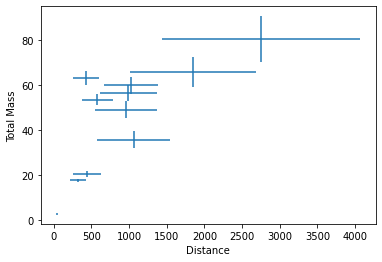

In [62]:
### PART A 3) ###

data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/gravitationalwaveevents.csv")

#data = pd.read_csv("gravitationalwaveevents.csv")

x = data['DL']
xerr = data['DL_err']
y = data['Mtot']
yerr = data['Mtot_err']
plt.errorbar(x,y,yerr,xerr,linestyle=' ')
plt.xlabel('Distance')
plt.ylabel('Total Mass')
plt.show()

***

## Part B - The data

Now it is your turn to look at observations of a gravitational wave event. 

1. Read in the datafile of the observed waveform `Observedwaveform.csv`. These files store the strain as a function of "GPS time" for the merger of two bodies. <div align="right">**[5 marks]**</div><br>

2. The GPS time of the merger for your waveform is 1205951542.153363.  Your data will need to be shifted so that the merger occurs at time = 0 secs.  This is required as we will compare our data with a which have the merger at t=0s.  <div align="right">**[4 marks]**</div><br>

3. We need to estimate the average noise and its standard deviation in our data. This requires careful thought about where the noise can be seen in the waveform.   <div align="right">**[6 marks]**</div>

**Answer:**

## 1. Opening the oberved data
Here we open the data in the same way we opended the gravitational events file. This data is plotted below.

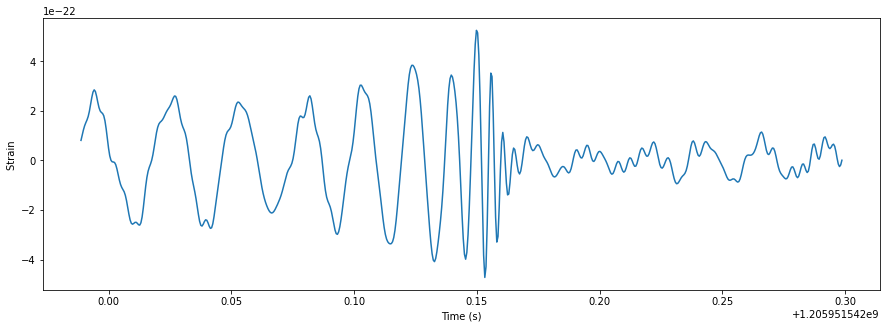

In [63]:
obs_data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Observedwaveform.csv")
#print(obs_data)
#obs_data = pd.read_csv("Observedwaveform.csv")
plt.figure(figsize=(15,5))
plt.plot(obs_data['time (s)'],obs_data['strain'])
plt.xlabel("Time (s)")
plt.ylabel("Strain ")
plt.show()

## 2. Centering our event on 0.
Here we center the event on 0 by prefoming a transform in time of $t^{\prime} = t - 1205951542.153363$.

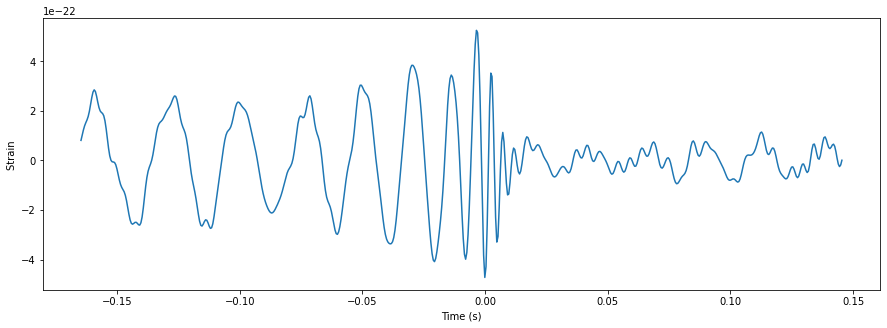

In [64]:
mert = 1205951542.153363
newt = obs_data['time (s)'] - mert
plt.figure(figsize=(15,5))
plt.plot(newt, obs_data['strain'])
plt.xlabel("Time (s)")
plt.ylabel("Strain ")
plt.show()

## 3. Estimation of the Noise in our data.
As we should not see any gravitational waves after the merger. its safe to say that the period just after the meger to the end of the data can be used to estimate the noise. Here we have a ocillating noise. If we assume all of this signal is background that we dont want then the true mean should be Zero. However, the mean of this sample will be greater then zero as we do not have an infinite time series of noise. As we plan to use this noise as an estimate on the standard deviation of the data. We should calculate the absolute mean. This is done below.


In [65]:
import numpy as np

mean = np.mean(abs(obs_data['strain'][389:len(obs_data['strain'])]))
sd = np.std(abs(obs_data['strain'][389:len(obs_data['strain'])]))
print('Noise Mean: ',mean)
print('Noise standard deviation: ',sd)
print('calculation complete')

Noise Mean:  4.083568035765596e-23
Noise standard deviation:  2.5309982096543798e-23
calculation complete


***

## Part C - Using model waveforms to estimate the total mass and distance to the system "a by-eye estimate") 

In this part of the question we will attempt to produce a waveform for any mass and distance values using a reference waveform with $M=40 M_{sun}$, $D=1$Mpc and $q=M_2/M_1 = 1$ and scaling it by any new mass and/or distance.    

The reference waveform/template we will use is```reference_Mtot40Msun_Dist1Mpc.csv```. 

You will need to follow the steps below when answering this question:

1. Open the reference/template file using the `pandas` package. Write a function in python to scale the time and strain of any waveform with $q=1$, total mass $M$ and distance $D$ from the reference waveform file ```reference_Mtot40Msun_Dist1Mpc.csv``` using the equations for how the waveform strain and time depends on mass and distance from [Chapter 8 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2021/blob/master/blended_exercises/Chapter8/Chapter8.ipynb). <div align="right"> **[10 marks]**</div><br>

2. Test your function works by substituting in $M=70\,M_{sun}$ and $D=5$Mpc, and compare your resulting waveform with the template in `reference_Mtot70Msun_Dist5Mpc.csv`.  Comment on your result. <div align="right">**[7 marks]**</div><br>
 
3. Use your function to scale the template waveform ($M=40 M_{sun}$, $D=1$Mpc) to make an initial rough estimate "by eye" of the total mass and distance that "best" fits your data (e.g. to within +/- 5 Msun, +/- 100 Mpc). <div align="right">**[8 marks]**</div>

**Answer:**

## 1. The Reference Waveform

The reference waveform can be scaled using the following equations.
$$
h(t,M,D) = \left(\dfrac{M}{M^\prime}\right) \left(\dfrac{D^\prime}{D}\right) ~ h(t^\prime) 
$$

where: 

$$ t=\left(\dfrac{M}{M^\prime}\right)t^\prime  $$

If we set $M^\prime = 40 M_{sun}$ and $D^\prime = 1 Mpc$. Then we can create a function of $M, D$. 

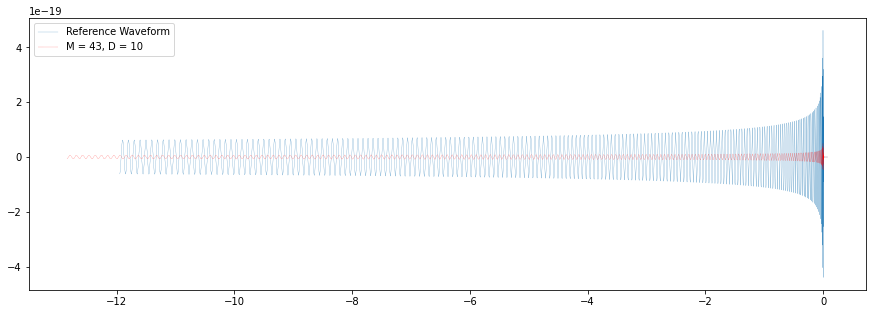

In [66]:
#read refence data
refdata = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/reference_Mtot40Msun_Dist1Mpc.csv')
plt.figure(figsize=(15,5))
plt.plot(refdata['time (s)'],refdata['strain'],linewidth=0.2,label='Reference Waveform')

def scalewaveform(M,D):
    strain_M_D = (M/40)*(1/D)*refdata['strain']
    time_M_D = (M/40)*refdata['time (s)']
    return strain_M_D, time_M_D

y , x = scalewaveform(43,10)
plt.plot(x,y,linewidth=0.2,color='Red',linestyle='--',label='M = 43, D = 10')
plt.legend()
plt.show()


## 2. Scaling the Reference waveforming
For $M = 70M_{sun}$ and $D=5 Mpc$.

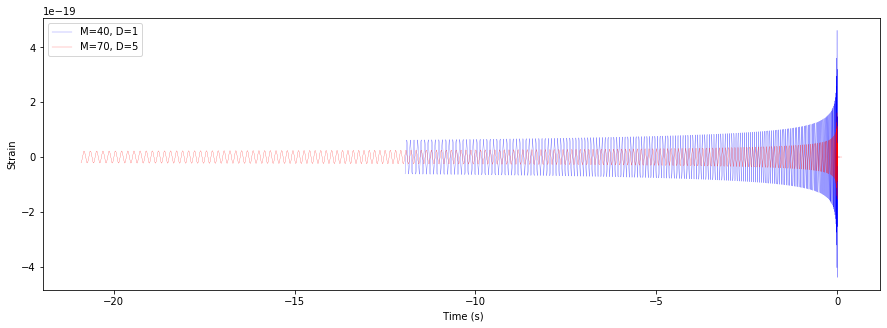

In [67]:
y , x = scalewaveform(70,5)
plt.figure(figsize=(15,5))
plt.plot(refdata['time (s)'],refdata['strain'],linewidth=0.2,color='blue',label='M=40, D=1')
plt.plot(x,y,linewidth=0.2,color='red',label='M=70, D=5')
plt.xlabel(" Time (s)")
plt.ylabel("Strain")
plt.legend()
plt.show()

We can see from the two wavefroms that when the Mass and Distance decreased the amplitude has decreased and the frequency has also decreased. These difference are expected when looking at the equation above. 

## 3. "Bye-eye" estimate of M and D using the scaled waveform

To guess the mass and distance by eye I needed to reduce the range of the reference waveform in order to see the observed waveform. I then worked by adjusting Mass until the fequency of the waves where approximatly the same. Then changed the distnace to either reduce or increase the amplitude of the wave.

[]

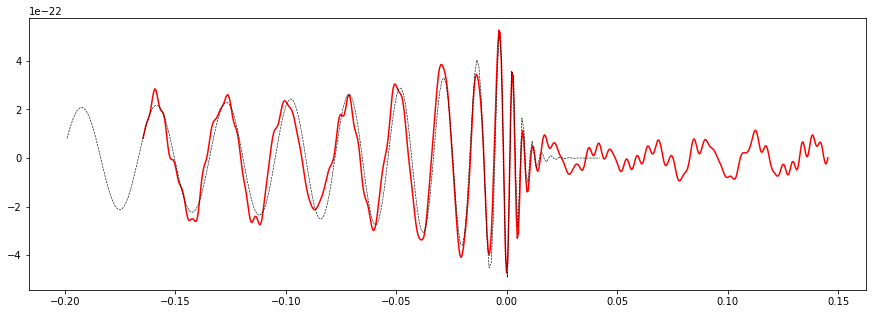

In [68]:
M = 76
D = 1700
y ,x = scalewaveform(M,D)

yerr1,xerr1 = scalewaveform(M+5,D+100)
#the statements below just reduce the size of the scaled waveform

for i in range(0,len(x)):
    if x[i] >= -0.2:
        num = i
        break

for i in range(0,len(x)):
    if y[i] == 0:
        num2 = i
        break

xnew = x[num:num2]
xerr = x[num:num2]-xerr1[num:num2]
ynew = y[num:num2]
yerr = y[num:num2]-yerr1[num:num2]
plt.figure(figsize=(15,5))
plt.plot(newt,obs_data['strain'],color='red')
plt.plot(xnew,ynew,linewidth=0.6,color='black',linestyle='--')
plt.plot()


Looking at the wave fit above the scale waveform by eye, matches with the observed data for mass $M = 76  M_{sun}$, and $D = 1700  Mpc$. These values are of a reasonable range. 

***

## Part D - Get data and model to have the same x values. 

Now that we have our observed data, and can scale the template data to any mass and distance, we need to do one more fix.  Currently our data and our templates have different sampling on the $x$ axis - ie they have different values of $x$ (time(.  We need to try and match the $x$ times up so that for each value of $x$ we can compare the $y$ values (the observed strain with the strain from the scaled template).  

We need to only consider the times when we have observed data, so we will trim our data set.

1.  Our data waveform starts at some time $t_{\rm min}$. Find out what this is.  Next, take your observed data waveform and output data for $t$ > $t_{\rm min}$ and $t$ < $0$ (ie only keep information for times $\le 0$ (before the merger), or for times where there is data).  Verify, by plotting, that your new observed waveform only has data in this restricted time range. <div align="right">**[5 marks]**</div><br>

2. We now need to put both observed and template waveforms on the same time sampling, ie the same number of data points.  The model waveforms have approx 20,000+ time steps, yet the data has less than hundreds in the time range specified!  

We need to interpolate between our observed data and the template. To do this use the following code:

(assuming `x[index]` and `y[index]` are the observed data from Part D.1 and scaled template time is your scaled reference template to your suggested values of $M$ and $D$ from Part C3.)

```
from scipy.interpolate import interp1d

# get interpolation object using data
interp_fn =interp1d(x[index],y[index],bounds_error=False)

# now get scaled template and get the strains for the same x axis as data
interp_strain = interp_fn(scaled_template_time)

#plot
plt.plot(scaled_template_time,interp_strain)
```

Briefly verify that this works. <div align="right">**[5 marks]**</div>

*Hints:*
 * *One can use the following code example  `index = np.where((data > 5)&(data < 10))[0]`. This type of statement returns a list of indices (`index`) where the conditions in the bracket have been met.  `data_[index]` pulls out `data` that satisfy the conditions in the brackets above.*

*Your answer here*

## 1.  Restricting our time range.

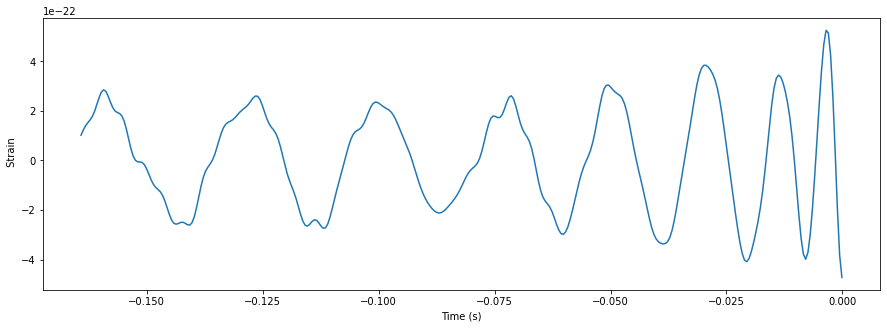

In [69]:
tmin = min(newt)
index_obs = np.where((newt > tmin)&(newt < 0))[0]
xnew1 = newt[index_obs]
ynew1 = obs_data['strain'][index_obs]
plt.figure(figsize=(15,5))
plt.plot(xnew1,ynew1)
plt.xlabel("Time (s)")
plt.ylabel(" Strain")
plt.show()


Above we can see that the time range is $t_{min} < t < 0$ as we require.

## 2. Interpolating between our Observed data and Scaled Waveform

To be able to preform the Chi-square liklihood next we need to have the same number of data points for both the model and observed data on the same time sampling. Below we do this using the Interpolate function.

 We have sucuessfull interpolated!


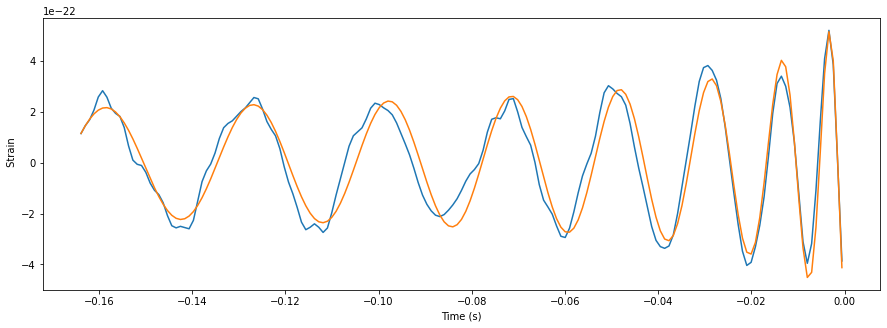

In [70]:
from scipy.interpolate import interp1d

# get interpolation object using data
interp_fn =interp1d(xnew1,ynew1,bounds_error=False)
index_ref = np.where((x >= tmin)&(x <= 0))[0]

# now get scaled template and get the strains for the same x axis as data
interp_strain_obs = interp_fn(x[index_ref])

#plot
if len(interp_strain_obs) == len(x[index_ref]):
    print(" We have sucuessfull interpolated!")  # to verify the interpolation

plt.figure(figsize=(15,5))
plt.plot(x[index_ref],interp_strain_obs)
plt.plot(x[index_ref],y[index_ref])
plt.xlabel("Time (s)")
plt.ylabel(" Strain")
plt.show()

***

## Part E - Estimating the best fit total mass using MCMC 

Now that we know how to make the scaled template (ie 40Msun,1Mpc template file) and the observed data have the same time sampling, we can use MCMC to find out the total mass of the system that made the data we see.  

You can assume the "by-eye" estimate of the distance above.

Think carefully about what the likelihood function will be in this case (see Chapters 6-9).  

1. Use MCMC to sample the total mass, $M$, to produce a best-fit value for your data.  <div align="right">**[20 marks]**</div> <br>

2.  Display the results in an appropriate manner and comment on your findings, as well as your results from the MCMC. <div align="right">**[15 marks]**</div> <br>

3. Report the median and 90% credible limits on your value of $M$.  <div align="right">**[10 marks]**</div> <br>
 
You may assume that:
- the noise is described by a Gaussian distribution, 
- the total mass of the system is in the range [20,100] $M_{sun}$.
 
_Hints:_

 * _Think very carefully about the form of your likelihood since here we are comparing observed data with a model_
 
 * _You should work with "log(Likelihood)" to avoid numerical errors  - note this will affect both your posterior and the step in the MCMC chain where we usually write $p_{\rm proposed}/p_{\rm current}$_

 * _The step size between samples of the MCMC is quite important. A suggested value is $0.1\,M_{sun}$_
 
 * _The initial guess of your mass is also very important. You may find yourself getting into a local minimum rather than your code finding the true minimum._
 
 * _Test your MCMC on a small number of samples (e.g. 10-100) before trying it with a larger number (e.g. $10^5$ or $10^6$)_
 
 * _At the end, ask yourself if you need to include every sample?_
 
 * _Depending on your step size, this part can take a long time to run. Suggest that you move all your plotting routines to a different code cell to save you re-running everything 10000s of times when you just want to change a plot command._
 
 * _To find out how long it will take for a Jupyter notebook to compile the MCMC code cell, add the following snippet to your code before you go into your MCMC loop (where Nsteps is the number of steps your MCMC is using):_
 
```def time_spent_waiting(n):
    from datetime import datetime,timedelta
    preddur=[n*0.01,n*0.02]
    print('predicted duration: {:.2f}-{:.2f} mins'.format(preddur[0]/60.,preddur[1]/60.))
    return```

**Answer:**

## 1. Single Parameter MCMC algorithm

To calculate the mass of the observed data we need to sample the parameter space and look for the parameter that best fits the data. Because we want the best-fit we can use the chisquared statistic to determine this. Hence we want to find the parameter that will minimise this. We are trying to calculate the probablity that our model given our data. Using bayes theorm this can be written as:

$$
P(\theta|D) \propto P(D|\theta) P(\theta)
$$
We can neglect the normalization of this as we are only calculating the mean/median and standard deviation. The liklihood function will be:
$$
f(D|\theta) = \frac{1}{\sqrt{2 \pi} \sigma_i} \exp({\frac{(x_i - \mu)^2}{2 \sigma_i}})
$$
The likliness for fit parameters will be of the form:
$$
L = \Pi^{n}_{i=1} f(D|\theta) = (\frac{1}{2 \pi \sigma^{2}}) \exp({\frac{\sum^{n}_{i=1} (x_i - \mu _i)^2 }{2 \sigma ^2}}) 
$$
If we take the log likeliness instead of just the likeliness we get the following:
$$
ln(L) \propto -\frac{1}{2} \sum _i ( \frac{(O_i-E_i)^2}{\sigma ^2} ) 
$$

Where $O$ is the observed value and $E$ is the expected value we get from out model. In our case this is the corresponding scaled waveform value. 
The prior $P(\theta)$ is important to concider, its important that the prior does not restrict postieror to a range that prevents it converging on the best fit parameter. So I have decided to make the prior a uniform distribution in the mass range 20-100. As we have been told above this is the range that it is contained and hence gives the algorithm all the freedom to let the likeliness function determin the postieror inside thius range. It will only act to prevent the alorithm from sampling anything outside the region since we already know the probablity of that is zero. I could have reduced the prior from an estimate with the "bye-eye" fit. The benifit of this is it makes it more computationally efficient, as it will not sample as much parameter space. However if we restrict it too much we are almost measuring the same data twice, which will create a bias and we do not want this. So the best option is to use a uniform prior since we dont have to worry about computational efficiency.

In [71]:
from scipy.stats import uniform, norm
import numpy as np
from datetime import datetime,timedelta

To run the MCMC I decided to slit the relavent componets into functions. The first of these functions just generates the model data for the specific parameter and interpolates the data so that it is appropriate to fit.  

In [72]:
#caluationg the new model
def Modeldata(M,D,newt,obs_data):
    y ,x = scalewaveform(M,D)
    tmin = min(newt)
    index_obs= np.where((newt >= tmin)&(newt <= 0))[0]
    xnew1 = newt[index_obs] #observed data t
    ynew1 = obs_data['strain'][index_obs] #observed data strain
    
    interp_fn =interp1d(xnew1,ynew1,bounds_error=False) 
    index_ref = np.where((x >= tmin)&(x < 0))[0]

    interp_strain_obs = interp_fn(x[index_ref])
    return x[index_ref],interp_strain_obs,y[index_ref]

Below are the fucntions for the postieror, prior and likeliness. Notice that because we are now working with $ln(L)$. The posterior becomes:
$$
ln(P(\theta | D)) \propto ln(L) + ln(P(\theta))
$$

In [73]:
def likelyness(M,yerr):
    t,s_obs,s_model = Modeldata(M,1700,newt,obs_data)
    resid = s_obs - s_model
    return -0.5*np.sum( ((resid)**2)/(yerr**2) )

def prior(M):
    return uniform.logpdf(M,20,100) #uniform log(probablity)

def posterior(M,yerr):
    return likelyness(M,yerr)+prior(M) 

Below is the function that will run the MCMC Metropolis-Hastings algorithm. The probility of moving has changed from the standard algorithm to:
$$
P_{move} = e^{P_{proposed} - P_{current}}
$$  

In [74]:

def MCMC_al(Mass,yerr,N_MCMC,deltaM):
    for i in range(N_MCMC):
        Mcurrent = posterior(Mass[i],yerr)
        delta_M = np.random.normal(0,deltaM)
        
       # print(i)
        M_p = Mass[i]+delta_M
        Mproposed = posterior(M_p,yerr)
        p_new_move = np.exp(Mproposed-Mcurrent) #discuss this above
       # print('pmove',p_new_move)
        if p_new_move > 1:
            Mass[i+1] = M_p #accept new parameters
        else:
            u_random = np.random.uniform(0,1)
            if u_random <= p_new_move:
                Mass[i+1] = M_p         #accept with prob p_new_move
            else:
                Mass[i+1] = Mass[i]
    return Mass

## Determining M from our MCMC algorithm

### Convergence

To see whether our check that our algorithm is working and is converging lets look at staring positiona aroud our bye-eye estimate. Below are three different staring masses. 

In [75]:
yerr = 4.083568035765596e-23
N_MCMC = 1000
Mass = np.zeros(N_MCMC+1) 
deltaM = 0.1
preddur=[N_MCMC*0.01,N_MCMC*0.02]
print('predicted duration: {:.2f}-{:.2f} mins'.format(preddur[0]/60.,preddur[1]/60.))
print('Calculating MCMC..')
Mass[0] = 77
m1_77 = MCMC_al(Mass,yerr,N_MCMC,deltaM)
print('Done')

predicted duration: 0.17-0.33 mins
Calculating MCMC..
Done


In [76]:
print('predicted duration: {:.2f}-{:.2f} mins'.format(preddur[0]/60.,preddur[1]/60.))
print('Calculating MCMC..')
Mass = np.zeros(N_MCMC+1) 
Mass[0] = 80
m1_80 = MCMC_al(Mass,yerr,N_MCMC,deltaM)
print('Done')

predicted duration: 0.17-0.33 mins
Calculating MCMC..
Done


In [77]:
print('predicted duration: {:.2f}-{:.2f} mins'.format(preddur[0]/60.,preddur[1]/60.))
print('Calculating MCMC..')
Mass = np.zeros(N_MCMC+1) 
Mass[0] = 70
m1_70 = MCMC_al(Mass,yerr,N_MCMC,deltaM)
print('Done')

predicted duration: 0.17-0.33 mins
Calculating MCMC..
Done


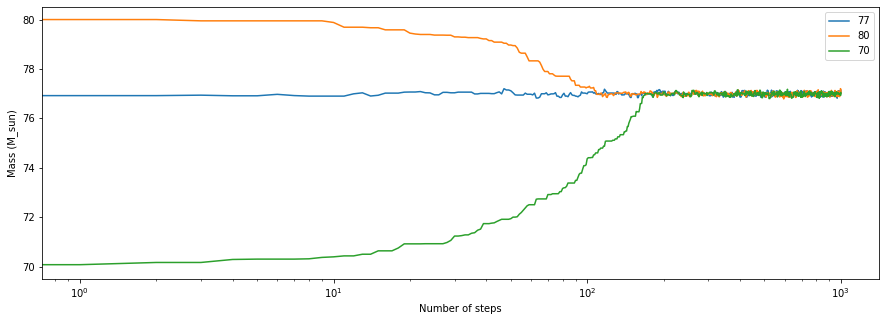

In [78]:
plt.figure(figsize=(15,5))
plt.plot(m1_77,label='77')
plt.plot(m1_80,label='80')
plt.plot(m1_70,label='70')
plt.ylabel("Mass (M_sun)")
plt.xlabel("Number of steps")
plt.xscale('log')
plt.legend()
plt.show()

Above we can see that the algorithm is definitly converging around $M = 77 M_{sun}$. Lets start from here to now calculate the Mass without a burn in.

In [79]:
yerr = 4.083568035765596e-23
N_MCMC = 100000
Mass = np.zeros(N_MCMC+1)
Mass[0] = 77 #using our by eye as a guess
deltaM = 0.1

preddur=[N_MCMC*0.01,N_MCMC*0.02]
print('predicted duration: {:.2f}-{:.2f} mins'.format(preddur[0]/60.,preddur[1]/60.))
print('Calculating MCMC..')
m = MCMC_al(Mass,yerr,N_MCMC,deltaM)
print('Done')


predicted duration: 16.67-33.33 mins
Calculating MCMC..
Done


To check the algorithm we can look at the plot of mass against the iteration number to see how the alogorithm explores parameter space. The function was started close to its convergence point here so there isnt a long burn in.

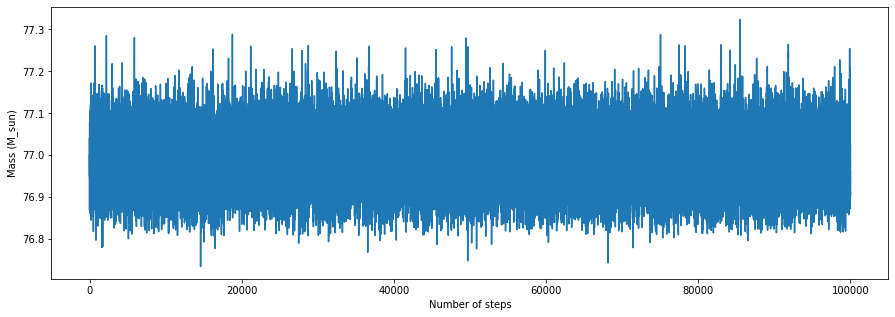

In [80]:
plt.figure(figsize=(15,5))
plt.plot(Mass)
plt.ylabel("Mass (M_sun)")
plt.xlabel("Number of steps")
plt.show()

### Calculating Median and Credible interval

 Total Mass of the system is (Median) 76.991 $\pm$ 0.126. we have the 90% credible interval is 77.117 < M < 76.865


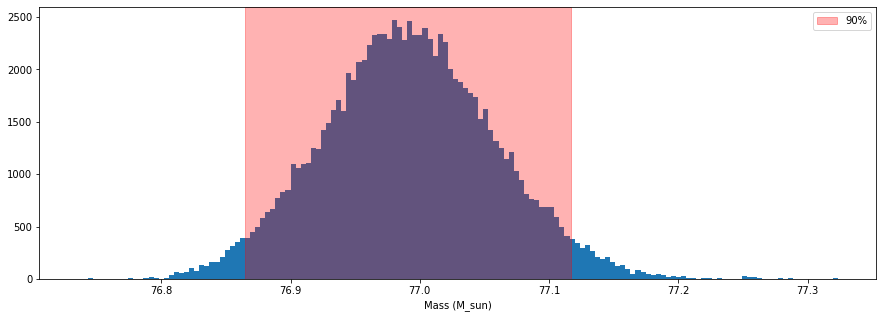

In [81]:
import numpy as np
import scipy.stats

def median_confidence_interval(data):
    m = np.median(data)
    se = np.std(data)
    I1 = m + 1.9*se
    I2 = m - 1.9*se
    return m, I1, I2 , 1.9*se

mass1,mupper1,mlower1,merror1 = median_confidence_interval(m)
print(" Total Mass of the system is (Median) {:.3f} $\pm$ {:.3f}. we have the 90% credible interval is {:.3f} < M < {:.3f}".format(mass1,merror1,mupper1,mlower1))
plt.figure(figsize=(15,5))
plt.hist(m, bins=150)
plt.axvspan(mupper1,mlower1,color='red',label='90%', alpha=0.3)
plt.xlabel("Mass (M_sun)")
plt.legend()
plt.show()

What does the best-fit look like on the observed data.

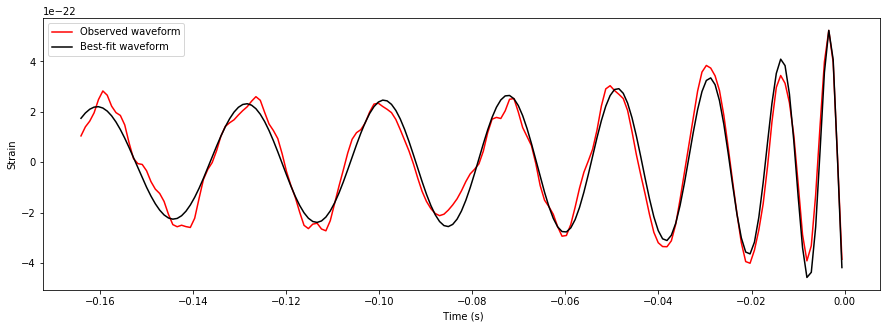

In [82]:
plt.figure(figsize=(15,5))
plt.plot(Modeldata(mass1,1700,newt,obs_data)[0],Modeldata(mass1,1700,newt,obs_data)[1],color='red',label='Observed waveform')
plt.plot(Modeldata(mass1,1700,newt,obs_data)[0],Modeldata(mass1,1700,newt,obs_data)[2],color='black',label='Best-fit waveform')
plt.ylabel("Strain")
plt.xlabel(" Time (s)")
plt.legend()
plt.show()

***

## Part F - Estimating mass *and distance* using MCMC for the merging system 

If you run into any difficulties completing this component of the coursework, you can still attempt Part G using either your by-eye estimates for $M$ and $D$ from Part C, or your $M$ from the MCMC from Part E and your by eye estimate for $D$ in Part C.

1. Repeat your MCMC analysis to now estimate the total mass, $𝑀$, *and* the distance, $𝐷$ at the same time.   <div align="right">**[15 marks]**</div><br>

2.  Display the results in an appropriate manner and comment on your findings, as well as your results from the MCMC. <div align="right">**[10 marks]**</div><br>

3.  Report the median and 90% credible limits on your value of $M$ and compare your best fit waveform with the data. Comment on your result.  <div align="right">**[15 marks]**</div>
 

_Hints:_
 * *Now your theta_current for the MCMC will have 2 values (Mtot and D) as such you will need to specify 2 initial parameters for theta_current. Whereas before you may have used something like `theta_current.append([Mtot_guess])`, now you will need something like `theta_current.append(np.array([Mtot_guess,D_guess]))` and similarly your `D_theta` will need to have 2 values to tell the MCMC to take a random step in both Mtot and D values in each step of the MCMC.*
 * *Be careful not to get caught up in messy arrays - if in doubt run the MCMC for 5-10 steps and print out the theta_current to check everything ends up looking like it should.*

**Answer:**

*Your answer here*

## Multiparameter MCMC algorithm

To expand the MCMC algorithm above to take muliple paramters we need to change the prarameter to a 2D array. The following functions contain the appropiate changes to the above algorithm. With the addition of an alteration to the prior, where we have added a term to account for the Distance measurement.

In [83]:
#repeat MCMC but for theta as a 2 dimensional array?
def likelyness_2D(theta,yerr):
    M,D=theta
    t,s_obs,s_model = Modeldata(M,D,newt,obs_data)
    resid = s_obs - s_model
    return -0.5*np.sum( ((resid)**2)/(yerr**2) )

def prior_2D(theta):
    M,D=theta
    return uniform.logpdf(M,20,100) + uniform.logpdf(D,1000,2000)

def posterior_2D(theta,yerr):
    return likelyness_2D(theta,yerr)+prior_2D(theta)

def MCMC_al2D(theta,yerr,N_MCMC,deltaM,deltaD):
    for i in range(N_MCMC):
        Thetacurrent = posterior_2D(theta[i,:],yerr)
        delta_M = np.random.normal(0,deltaM)
        delta_D = np.random.normal(0,deltaD)
        delta_theta = np.array([delta_M,delta_D])
        Theta_p = theta[i,:]+delta_theta
        Thetaproposed = posterior_2D(Theta_p,yerr)
        p_new_move = np.exp(Thetaproposed-Thetacurrent) 
       # print('pmove',p_new_move)
        if p_new_move > 1:
            theta[i+1,:] = Theta_p #accept new parameters
        else:
            u_random = np.random.uniform(0,1)
            if u_random <= p_new_move:
                theta[i+1,:] = Theta_p         #accept with prob p_new_move
            else:
                theta[i+1,:] = theta[i,:]
        
    return theta

## Detemining M and D in one MCMC routine

### Convergence

How do we know that the MCMC has reached convergence? Below we run the MCMC algorithm for different starting points to see if the algorithm will consistently converge to the same place.

In [84]:
yerr = 4.083568035765596e-23
N_MCMC = 1000
deltaM = 0.5
deltaD = 10 
preddur=[N_MCMC*0.01,N_MCMC*0.02]
theta = np.zeros([N_MCMC+1,2]) #2columns and N_MCMC+1 rows. 
theta[0,:] = np.array([80,1900])
print('predicted duration: {:.2f}-{:.2f} mins'.format(preddur[0]/60.,preddur[1]/60.))
print('Calculating MCMC..')
m2d_80 = MCMC_al2D(theta,yerr,N_MCMC,deltaM,deltaD)
print('Done')


predicted duration: 0.17-0.33 mins
Calculating MCMC..
Done


In [85]:
theta = np.zeros([N_MCMC+1,2]) #2columns and N_MCMC+1 rows. 
theta[0,:] = np.array([70,1400]) 
print('predicted duration: {:.2f}-{:.2f} mins'.format(preddur[0]/60.,preddur[1]/60.))
print('Calculating MCMC..')
m2d_70 = MCMC_al2D(theta,yerr,N_MCMC,deltaM,deltaD)
print('Done')


predicted duration: 0.17-0.33 mins
Calculating MCMC..


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning:

overflow encountered in exp



Done


In [86]:
theta = np.zeros([N_MCMC+1,2]) #2columns and N_MCMC+1 rows. 
theta[0,:] = np.array([76,1400]) 
print('predicted duration: {:.2f}-{:.2f} mins'.format(preddur[0]/60.,preddur[1]/60.))
print('Calculating MCMC..')
m2d_76 = MCMC_al2D(theta,yerr,N_MCMC,deltaM,deltaD)
print('Done')

predicted duration: 0.17-0.33 mins
Calculating MCMC..
Done


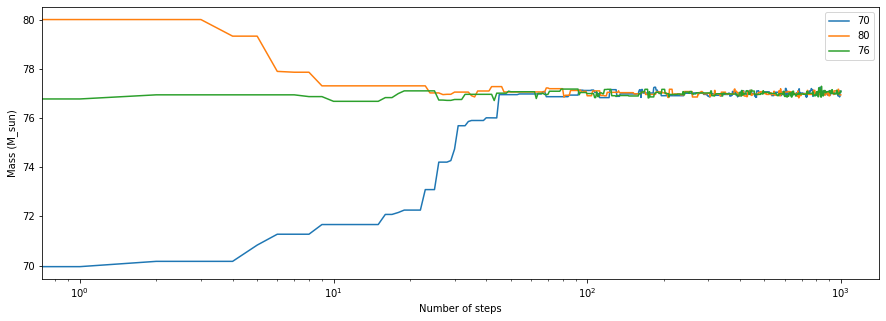

In [87]:
plt.figure(figsize=(15,5))
plt.plot(m2d_70[:,0],label='70')
plt.plot(m2d_80[:,0],label='80')
plt.plot(m2d_76[:,0],label='76')
plt.ylabel("Mass (M_sun)")
plt.xlabel("Number of steps")
plt.xscale('log')
plt.legend()
plt.show()

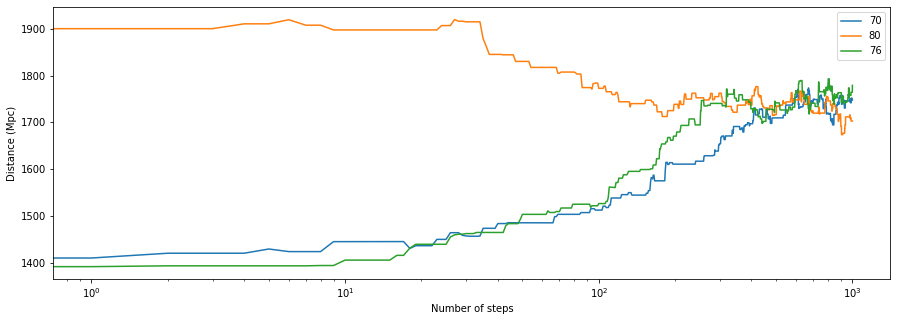

In [100]:
plt.figure(figsize=(15,5))
plt.plot(m2d_70[:,1],label='70')
plt.plot(m2d_80[:,1],label='80')
plt.plot(m2d_76[:,1],label='76')
plt.ylabel("Distance (Mpc)")
plt.xlabel("Number of steps")
plt.xscale('log')
plt.legend()
plt.show()

We can see that the convergence has been reached as the "burn-in" of MCMC chains starting at different values all converge around the same area. This is seem for both parameters M and D. However it is more constrained by M then D.

***

### Running MCMC closer to the convergence.
Since above we have seen the convergence is happening, we can now begin our MCMC around this convergence to generate out best fit parameters.

In [89]:
yerr = 4.083568035765596e-23
N_MCMC = 100000
theta = np.zeros([N_MCMC+1,2]) #2columns and N_MCMC+1 rows. 
theta[0,:] = np.array([77,1700]) 

deltaM = 0.5
deltaD = 10 #try 5

preddur=[N_MCMC*0.01,N_MCMC*0.02]
print('predicted duration: {:.2f}-{:.2f} mins'.format(preddur[0]/60.,preddur[1]/60.))
print('Calculating MCMC..')
m2d = MCMC_al2D(theta,yerr,N_MCMC,deltaM,deltaD)
print('Done')

predicted duration: 16.67-33.33 mins
Calculating MCMC..
Done


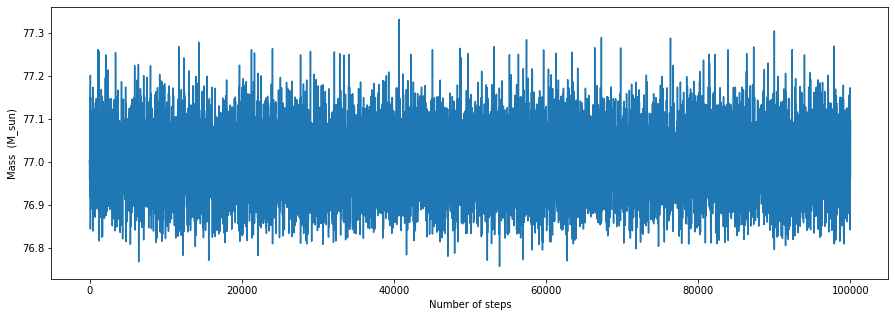

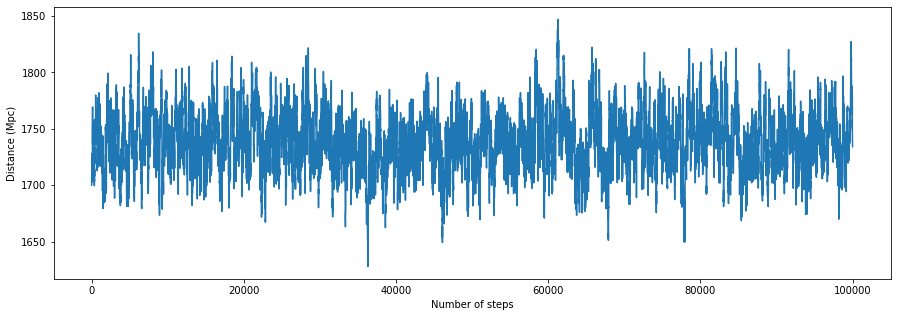

In [90]:
plt.figure(figsize=(15,5))
plt.plot(theta[:,0])
plt.xlabel("Number of steps")
plt.ylabel("Mass  (M_sun)")
plt.show()
plt.figure(figsize=(15,5))
plt.plot(theta[:,1])
plt.xlabel("Number of steps")
plt.ylabel("Distance (Mpc)")
plt.show()

We can see above that both parameters have converged and are sutible to be analysed further. 

### Total Mass and Distance of the system

 Total Mass of the system is 76.998 $\pm$ 0.129. With 90% credible interval 77.127 < M < 76.869.


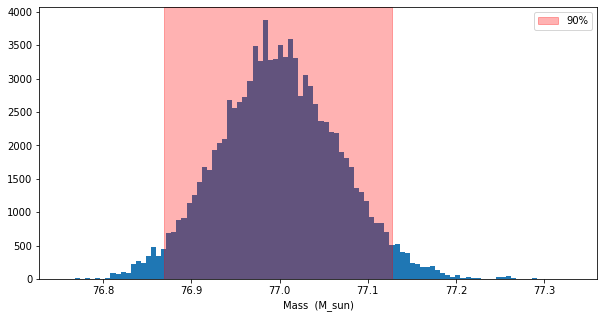

In [91]:
import numpy as np
import scipy.stats
import numpy as np, scipy.stats as st
M,D = m2d[:,0],m2d[:,1]

mass ,mlower,mupper,merror = median_confidence_interval(M)
print(" Total Mass of the system is {:.3f} $\pm$ {:.3f}. With 90% credible interval {:.3f} < M < {:.3f}.".format(mass,merror,mlower,mupper))
plt.figure(figsize=(10,5))
plt.hist(theta[:,0], bins=100)
plt.axvspan(mupper,mlower,color='red',label='90%', alpha=0.3)
plt.xlabel("Mass  (M_sun)")
plt.legend()
plt.show()


 Distance of the system is 1737.766 $\pm$ 50.955. With 90% credible interval 1686.811 < D < 1788.721


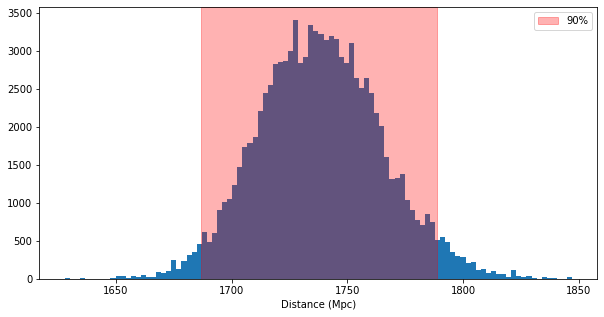

In [92]:
dis,dupper,dlower,derror = median_confidence_interval(D)
print(" Distance of the system is {:.3f} $\pm$ {:.3f}. With 90% credible interval {:.3f} < D < {:.3f}".format(dis,derror,dlower,dupper))
plt.figure(figsize=(10,5))
plt.hist(theta[:,1],bins=100)
plt.axvspan(dupper,dlower,color='red',label='90%', alpha=0.3)
plt.xlabel("Distance (Mpc)")
plt.legend()
plt.show()

We can see that the distrbutions of both mass and distance look like normal distrbutions. Which is expected since our liklihood function was normal. 

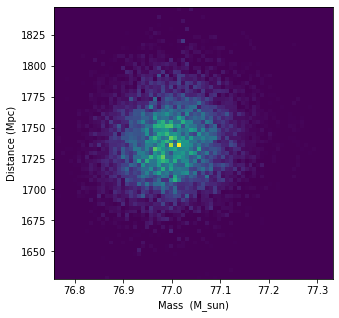

In [93]:
plt.figure(figsize=(5,5))
plt.hist2d(x=theta[:,0],y=theta[:,1],bins=70)
plt.xlabel("Mass  (M_sun)")
plt.ylabel("Distance (Mpc)")
plt.show()

Lets see how what the best-fit model look next to our observed data. We can see that it looks like the values form the MCMC are a good fit to the data.

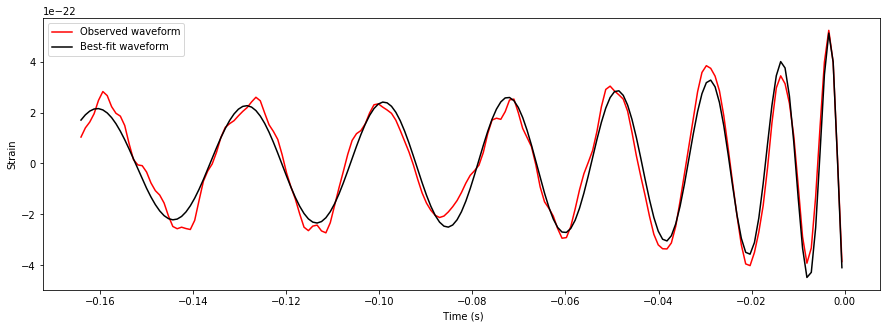

In [94]:
plt.figure(figsize=(15,5))
plt.plot(Modeldata(mass,dis,newt,obs_data)[0],Modeldata(mass,dis,newt,obs_data)[1],color='red',label='Observed waveform')
plt.plot(Modeldata(mass,dis,newt,obs_data)[0],Modeldata(mass,dis,newt,obs_data)[2],color='black',label='Best-fit waveform')
plt.ylabel("Strain")
plt.xlabel(" Time (s)")
plt.legend()
plt.show()

We can see that with the 2d MCMC the mass value is very close to the 1d MCMC. Looking at the above plot we can see that the fit appears to be the best-fit given the noise in the data. Where some peaks are overestimated and some are underestimated. We havent concidered the inclindation of the merging system that this data is from. An inclinded orbit will effect the amplitude of the wave we see and hence the distance estimate will be wrong for any inclination other than 0. However, as the mass can be measure from fitting to the fequency of the wave this value can still be estimated.  

## Part G - Putting it all together 

If you run into any difficulties completing Parts E and F, you can still attempt this part using your by-eye estimates for $M$ and $D$ from Part C.

1. Calculate the chirp mass for your system and the individual masses of your merging bodies. Comment on your individual masses. <div align="right">**[4 marks]**</div><br>

2. Plot your MCMC derived properties alongside the previously discovered gravitational wave systems. <div align="right">**[5 marks]**</div><br>
 
3. Estimate the period from your observed waveform around the peak amplitude of the wave. <div align="right">**[8 marks]**</div><br>

4. Assuming that the objects are not spinning, and that their orbits are Keplerian and essentially circular, use your period to estimate the orbital separation in **km** of the two bodies around peak amplitude. Think carefully about how the orbital period is related to the period of your gravitational wave.    <div align="right">**[10 marks]**</div><br>

5. Comment on what your analysis suggests are the best astrophysical candidates for the merging objects? <div align="right">**[3 marks]**</div>

**Answer:**

### 1. Calculating Chirp Mass $M_{ch}$
To calculate we require the following relation (from chapter 8).
$$
M_{ch} = \frac{(M_1 M_2)^{3/5}}{(M_1 + M_2)^{1/5}}
$$

Where $M_1$ and $M_2$ are the masses of the merging objects. However as we are modeling a waveform where $q=\frac{M_2}{M_1}=1$. The expression for $M_{ch}$ becomes.

$$
M_{ch} = (\frac{q}{(1+q)^{2}})^{3/5} M 
$$
Where M is the total Mass of the system.

In [95]:
M_ch = ((1)/((1+1)**2))**(3/5) * mass
delta_M_ch = ((1)/((1+1)**2))**(3/5) * merror
M1 = M2 = 0.5* mass 
error_M1 = error_M2 = 0.5*merror
print(' The "Chirp Mass" for this merger system is: {:.3f} $\pm$ {:.3f}'.format(M_ch,delta_M_ch))
print(" The individual masses of the system are M1 = {:.3f} $\pm$ {:.3f} M_sun. M2 = {:.3f} $\pm$ {:.3f} M_sun".format(M1,error_M1,M2,error_M2))

 The "Chirp Mass" for this merger system is: 33.515 $\pm$ 0.056
 The individual masses of the system are M1 = 38.499 $\pm$ 0.064 M_sun. M2 = 38.499 $\pm$ 0.064 M_sun


### Can we find q with an MCMC
One assumption that our model assumes is that $q=1$. This maybe a good enough approxiamtion for this event. But in general the two masses are never the same.
To determine the individual masses of a gravitational waves event when $q \neq 1$. We could expand the MCMC to find this parameter. To do this we would need a function that would generate a model with different $m_{1}$ and $m_{2}$. These parameters can be found then from the same process as above. Expanding the 2D MCMC algorithm into 3D or more dimensions should be straight forward. 

### 2. Comparing our data with previous gravitiational wave events

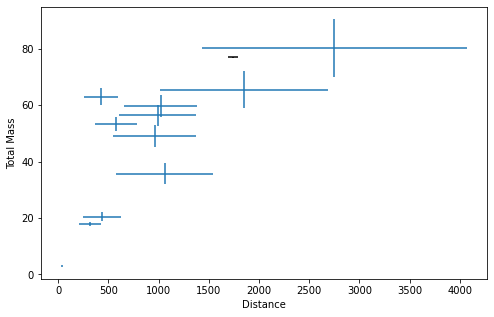

In [96]:

x = data['DL']
xerr = data['DL_err']
y = data['Mtot']
yerr = data['Mtot_err']

plt.figure(figsize=(8,5))
plt.errorbar(x,y,yerr,xerr,linestyle=' ')
plt.errorbar(dis,mass,yerr=(mupper-mass),xerr=(dupper-dis),color='black')
plt.xlabel('Distance')
plt.ylabel('Total Mass')
plt.show()

Looking at the plot above with the data point we added. We can see that the distance and total mass is better constrained than the other events on the graph. We can also see that our point is in a place that is consistent with the other events.


### 3. Estimating the Period of the waveform


We can estimate the peiod $P$ at the peak of the waveform by taking the time difference beteen two peaks and turning this into a Period. Below this is done for the maxmium strain and minimum strain. The seperation of these two points is $P/2$ or $\Delta T = P/2$. 

In [97]:
Max = max(obs_data['strain'])
Min = min(obs_data['strain'])

index_max = np.where(obs_data['strain']==Max)[0] #what index is the strain maximum 
index_min = np.where(obs_data['strain']==Min)[0] #what index is the strain minimum
cv = newt[index_max] 
print(cv)
vc = newt[index_min]
print(vc)
deltaT = -0.003525 - - 0.000107  #the cv and vc values
P = deltaT*2                     #calculates the period from deltaT
print("Period of the Observed waveform {:.3f} s".format(P))

330   -0.003525
Name: time (s), dtype: float64
337   -0.000107
Name: time (s), dtype: float64
Period of the Observed waveform -0.007 s


###4. Estimating Seperation before merger.  

The seperation of the object before the merger is expressed as the following (from chapter 8):
$$
R = ( \frac{G (2M)}{\omega_{max}^{2}})^{1/3}
$$
Where the gravitational constant $G \approx 6.67 \times 10^{-11}$. And $\omega_{max}$ is the maxmimum angluar frequency, and is related to $P$, that we just calculated as. 
$$
\omega _{max} = \frac{2 \pi}{P}
$$ 

In [98]:
def R(deltaT,M):
    G = 6.67E-11
    top = G*M*2E30 #for correct units in kg
    bottom = (np.pi/deltaT)**2
    return (top/bottom)**(1/3)
    
rad = R(deltaT,mass)
R_earth = 6371 # in km
print(" Seperation before merger {:.0f} km".format(rad/1000))

 Seperation before merger 230 km


We can see above the seperation before the merger. I also calculated the velocity of the objects at this point.

###5. Most likley stellar object merging in this event

Typical Values for stellar objects:

Supermassive black hole: 
$$
M \approx 10^{5} - 10^{10} M_{sun},  R \approx 0.001 - 400AU.
$$

Intermediate-mass black hole: 
$$
M \approx 10^{3} M_{sun}, R \approx 10^{3} km \approx R_{earth}.
$$

Stellar black hole: 
$$
 M \approx 10 M_{sun},  R \approx 30 km.
$$
 
Looking at the numbers above we can see that the objects are too massive to be stellar black holes. However they could be small Intermediate blackholes. We can be certain that the objects are black holes as the seperation just before merger is too small to be anything else. The density of the object must be extreamly high and the only objects that can have many solar masses in a distance so small is a black hole. We can see this more formally by looking at the Schawarzchild radius.
$$
R_{S} = 2.95*(\frac{m}{M_{sun}}) km
$$


In [99]:
R_s = 2.95*(mass)
print(" Radius of black hole: {:.0f} km".format(R_s))

 Radius of black hole: 227 km


This radius is very close to the seperation beform merger. This suggests that the estimate of there separation cannot quite be right, or atleast it has a large associated error. as otherwise the black holes are currently merging. An assumption made in this analysis is the eccentricity and the possiblity of a non circular orbit of the merging black holes. 

***

## Part H - Understanding, Presentation and Interpretation

An additional 20 marks will be awarded for evidence of understanding and knowledge via (for example) explanations, plots, comments on your results and well formatted and well explained results. Marks are also available for additional investigations carried out on your analysis above. These marks are available for those data analysis reports that show evidence of work that is *very high quality* or *outstanding* as per the decile descriptions in the Assessment Criteria for modules. <div align="right">**[20 marks]**</div>